# Визуалиция данных в Julia
Всем привет!  
Этот тьюториал посвящен визуализации данных на языке программирования [Julia](https://julialang.org/).  

## Глава 1: Gadfly    
В данной части нашего тьюториала мы будем использовать пакет [Gadfly](http://gadflyjl.org/dev/), который похож на ggplot в R.

### Установка пакетов Gadfly, RDatasets, DataFrames
 
В Jupyter Notebook пакеты устанавливаются следующим образом:

In [ ]:
import Pkg
Pkg.add("Gadfly") #в кавычках - название необходимого пакета

Установка занимает много времени, так что наберитесь терпения :)  
Зато потом всё будет быстро!

Для проверки того, что пакет установился успешно, воспользуйтесь простым кодом:
```julia
using Gadfly
plot(y=[1,2,3])
```

В этом тьюториале мы будем использовать датасеты из пакета [RDatasets](https://github.com/JuliaStats/RDatasets.jl) и функции библиотеки [DataFrames](https://dataframes.juliadata.org/stable/), установите их тоже.

### Начинаем с точечной диаграммы!
Во-первых, необходимо обратиться к установленным пакетам для дальнейшей работы с ними:

In [1]:
using Gadfly, RDatasets, DataFrames

Теперь сохраним в переменную `cars` датасет [cars](https://rdrr.io/r/datasets/cars.html), в котором есть данные о максимальной скорости (мили/час) и тормозного пути (футы) автомобилей в 1920-е.

In [8]:
cars = dataset("datasets", "cars")

50×2 DataFrame
│ Row │ Speed │ Dist  │
│     │ Int64 │ Int64 │
├─────┼───────┼───────┤
│ 1   │ 4     │ 2     │
│ 2   │ 4     │ 10    │
│ 3   │ 7     │ 4     │
│ 4   │ 7     │ 22    │
│ 5   │ 8     │ 16    │
│ 6   │ 9     │ 10    │
│ 7   │ 10    │ 18    │
│ 8   │ 10    │ 26    │
│ 9   │ 10    │ 34    │
│ 10  │ 11    │ 17    │
⋮
│ 40  │ 20    │ 48    │
│ 41  │ 20    │ 52    │
│ 42  │ 20    │ 56    │
│ 43  │ 20    │ 64    │
│ 44  │ 22    │ 66    │
│ 45  │ 23    │ 54    │
│ 46  │ 24    │ 70    │
│ 47  │ 24    │ 92    │
│ 48  │ 24    │ 93    │
│ 49  │ 24    │ 120   │
│ 50  │ 25    │ 85    │

В Gadfly есть основная функция `plot`, которая при работе с табличными данными ([DataFrame](https://dataframes.juliadata.org/stable/)) имеет следующий синтаксис:
```
plot(data::AbstractDataFrame, elements::Element...; mapping...)
```
Первый аргумент - датасет, из которого берем данные для графика. Затем следуют элементы - столбцы из датасета для осей x, y и др. Последующие агрументы необходимы для обозначения вида графика (линейный, точечный, гистограмма, столбчатый) и его оформления.

Давайте сделаем **точечный график** взаимосвязи максимальной скорости и тормозного пути по датасету `cars`.
По оси х будет столбец со скоростью `Speed`, y - тормозной путь `Dist`. `Geom.point` будет последним аргументом, чтобы график был точечным (если его не писать, то график все равно будет точечным).  
Сохраним график в переменную `p_cars`:

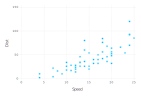

In [9]:
p_cars = plot(cars, x=:Speed, y=:Dist, Geom.point)

Также можно соединить точки на графике линиями, добавив `Geom.line`

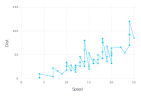

In [23]:
plot(cars, x=:Speed, y=:Dist, Geom.point, Geom.line)

Рассмотрим еще несколько возможностей на датасете [Motor Trend Car Road Tests](https://www.stat.auckland.ac.nz/~wild/data/Rdatasets/doc/datasets/mtcars.html)

In [13]:
mtcars = dataset("datasets", "mtcars")

32×12 DataFrame. Omitted printing of 6 columns
│ Row │ Model             │ MPG     │ Cyl   │ Disp    │ HP    │ DRat    │
│     │ String            │ Float64 │ Int64 │ Float64 │ Int64 │ Float64 │
├─────┼───────────────────┼─────────┼───────┼─────────┼───────┼─────────┤
│ 1   │ Mazda RX4         │ 21.0    │ 6     │ 160.0   │ 110   │ 3.9     │
│ 2   │ Mazda RX4 Wag     │ 21.0    │ 6     │ 160.0   │ 110   │ 3.9     │
│ 3   │ Datsun 710        │ 22.8    │ 4     │ 108.0   │ 93    │ 3.85    │
│ 4   │ Hornet 4 Drive    │ 21.4    │ 6     │ 258.0   │ 110   │ 3.08    │
│ 5   │ Hornet Sportabout │ 18.7    │ 8     │ 360.0   │ 175   │ 3.15    │
│ 6   │ Valiant           │ 18.1    │ 6     │ 225.0   │ 105   │ 2.76    │
│ 7   │ Duster 360        │ 14.3    │ 8     │ 360.0   │ 245   │ 3.21    │
│ 8   │ Merc 240D         │ 24.4    │ 4     │ 146.7   │ 62    │ 3.69    │
│ 9   │ Merc 230          │ 22.8    │ 4     │ 140.8   │ 95    │ 3.92    │
│ 10  │ Merc 280          │ 19.2    │ 6     │ 167.6   │ 123   │ 3.92    │
⋮
│ 22  │ Dodge Challenger  │ 15.5    │ 8     │ 318.0   │ 150   │ 2.76    │
│ 23  │ AMC Javelin       │ 15.2    │ 8     │ 304.0   │ 150   │ 3.15    │
│ 24  │ Camaro Z28        │ 13.3    │ 8     │ 350.0   │ 245   │ 3.73    │
│ 25  │ Pontiac Firebird  │ 19.2    │ 8     │ 400.0   │ 175   │ 3.08    │
│ 26  │ Fiat X1-9         │ 27.3    │ 4     │ 79.0    │ 66    │ 4.08    │
│ 27  │ Porsche 914-2     │ 26.0    │ 4     │ 120.3   │ 91    │ 4.43    │
│ 28  │ Lotus Europa      │ 30.4    │ 4     │ 95.1    │ 113   │ 3.77    │
│ 29  │ Ford Pantera L    │ 15.8    │ 8     │ 351.0   │ 264   │ 4.22    │
│ 30  │ Ferrari Dino      │ 19.7    │ 6     │ 145.0   │ 175   │ 3.62    │
│ 31  │ Maserati Bora     │ 15.0    │ 8     │ 301.0   │ 335   │ 3.54    │
│ 32  │ Volvo 142E        │ 21.4    │ 4     │ 121.0   │ 109   │ 4.11    │

Добавим названией моделей на график, а также окрасим по значению Displacement. При помощи функции `Scale` можно менять масштаб осей для более удобного отображения данных

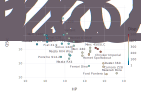

In [56]:
plot(mtcars, x=:HP, y=:QSec, label=:Model, color=:Disp,
         Geom.point, Geom.label, Scale.x_log10, Scale.y_log10)

### Линейный график
Выше мы рассмотрели, как создать **точечный график** с помощью аргумента `Geom.point`.  
Для создания линейных, столбчатых графиков и гистограмм необходимо использовать другие аргументы.


Создадим **линейный график**.  
Для этого необходимо использовать аргумент `Geom.line`.  
Также для удобства возьмем новый датасет с экономическими показателями США (PCE - расходы на потребление в млрд долл., Pop - численность населения в тыс., PSavert - норма сбережения в %, UEmpMed - средняя продолжительность безработицы в неделях, Unemploy - численность безработных в тыс.):

In [2]:
data_economics = dataset("ggplot2", "economics")

478×6 DataFrame
│ Row │ Date       │ PCE     │ Pop    │ PSavert │ UEmpMed │ Unemploy │
│     │ Dates.Date │ Float64 │ Int64  │ Float64 │ Float64 │ Int64    │
├─────┼────────────┼─────────┼────────┼─────────┼─────────┼──────────┤
│ 1   │ 1967-06-30 │ 507.8   │ 198712 │ 9.8     │ 4.5     │ 2944     │
│ 2   │ 1967-07-31 │ 510.9   │ 198911 │ 9.8     │ 4.7     │ 2945     │
│ 3   │ 1967-08-31 │ 516.7   │ 199113 │ 9.0     │ 4.6     │ 2958     │
│ 4   │ 1967-09-30 │ 513.3   │ 199311 │ 9.8     │ 4.9     │ 3143     │
│ 5   │ 1967-10-31 │ 518.5   │ 199498 │ 9.7     │ 4.7     │ 3066     │
│ 6   │ 1967-11-30 │ 526.2   │ 199657 │ 9.4     │ 4.8     │ 3018     │
│ 7   │ 1967-12-31 │ 532.0   │ 199808 │ 9.0     │ 5.1     │ 2878     │
│ 8   │ 1968-01-31 │ 534.7   │ 199920 │ 9.5     │ 4.5     │ 3001     │
│ 9   │ 1968-02-29 │ 545.4   │ 200056 │ 8.9     │ 4.1     │ 2877     │
│ 10  │ 1968-03-31 │ 545.1   │ 200208 │ 9.6     │ 4.6     │ 2709     │
⋮
│ 468 │ 2006-05-31 │ 9270.5  │ 299548 │ -1.5    │ 7.6     │ 6984     │
│ 469 │ 2006-06-30 │ 9338.9  │ 299801 │ -1.7    │ 8.2     │ 7228     │
│ 470 │ 2006-07-31 │ 9352.7  │ 300065 │ -1.5    │ 8.4     │ 7116     │
│ 471 │ 2006-08-31 │ 9348.5  │ 300326 │ -1.0    │ 8.1     │ 6912     │
│ 472 │ 2006-09-30 │ 9376.0  │ 300592 │ -0.8    │ 8.0     │ 6715     │
│ 473 │ 2006-10-31 │ 9410.8  │ 300836 │ -0.9    │ 8.2     │ 6826     │
│ 474 │ 2006-11-30 │ 9478.5  │ 301070 │ -1.1    │ 7.3     │ 6849     │
│ 475 │ 2006-12-31 │ 9540.3  │ 301296 │ -0.9    │ 8.1     │ 7017     │
│ 476 │ 2007-01-31 │ 9610.6  │ 301481 │ -1.0    │ 8.1     │ 6865     │
│ 477 │ 2007-02-28 │ 9653.0  │ 301684 │ -0.7    │ 8.5     │ 6724     │
│ 478 │ 2007-03-31 │ 9705.0  │ 301913 │ -1.3    │ 8.7     │ 6801     │

Выведем график изменения численности населения во времени:

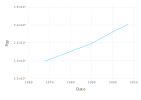

In [3]:
p_economics = plot(data_economics, x=:Date, y=:Pop, Geom.line)

Теперь выведем на один график численность населения и количество безработных.  
Для этого сохраним датасет только со столбцами `Date`, `Pop`, `Unemploy` в переменную `data_economics_`:

In [4]:
data_economics_ = dataset("ggplot2", "economics")[:,[:Date, :Pop, :Unemploy]]

478×3 DataFrame
│ Row │ Date       │ Pop    │ Unemploy │
│     │ Dates.Date │ Int64  │ Int64    │
├─────┼────────────┼────────┼──────────┤
│ 1   │ 1967-06-30 │ 198712 │ 2944     │
│ 2   │ 1967-07-31 │ 198911 │ 2945     │
│ 3   │ 1967-08-31 │ 199113 │ 2958     │
│ 4   │ 1967-09-30 │ 199311 │ 3143     │
│ 5   │ 1967-10-31 │ 199498 │ 3066     │
│ 6   │ 1967-11-30 │ 199657 │ 3018     │
│ 7   │ 1967-12-31 │ 199808 │ 2878     │
│ 8   │ 1968-01-31 │ 199920 │ 3001     │
│ 9   │ 1968-02-29 │ 200056 │ 2877     │
│ 10  │ 1968-03-31 │ 200208 │ 2709     │
⋮
│ 468 │ 2006-05-31 │ 299548 │ 6984     │
│ 469 │ 2006-06-30 │ 299801 │ 7228     │
│ 470 │ 2006-07-31 │ 300065 │ 7116     │
│ 471 │ 2006-08-31 │ 300326 │ 6912     │
│ 472 │ 2006-09-30 │ 300592 │ 6715     │
│ 473 │ 2006-10-31 │ 300836 │ 6826     │
│ 474 │ 2006-11-30 │ 301070 │ 6849     │
│ 475 │ 2006-12-31 │ 301296 │ 7017     │
│ 476 │ 2007-01-31 │ 301481 │ 6865     │
│ 477 │ 2007-02-28 │ 301684 │ 6724     │
│ 478 │ 2007-03-31 │ 301913 │ 6801     │

Кроме того, необходимо преобразовать нашу таблицу с помощью функции `stack` из `DataFrames`, которая создаст новые столбцы `variable` (со значениями Pop или Unemploy), `value` (численность населения или безработных):

In [5]:
println(stack(data_economics_,[:Pop,:Unemploy]))

956×3 DataFrame
│ Row │ Date       │ variable │ value  │
│     │ Dates.Date │ Cat…     │ Int64  │
├─────┼────────────┼──────────┼────────┤
│ 1   │ 1967-06-30 │ Pop      │ 198712 │
│ 2   │ 1967-07-31 │ Pop      │ 198911 │
│ 3   │ 1967-08-31 │ Pop      │ 199113 │
│ 4   │ 1967-09-30 │ Pop      │ 199311 │
│ 5   │ 1967-10-31 │ Pop      │ 199498 │
│ 6   │ 1967-11-30 │ Pop      │ 199657 │
│ 7   │ 1967-12-31 │ Pop      │ 199808 │
│ 8   │ 1968-01-31 │ Pop      │ 199920 │
│ 9   │ 1968-02-29 │ Pop      │ 200056 │
│ 10  │ 1968-03-31 │ Pop      │ 200208 │
│ 11  │ 1968-04-30 │ Pop      │ 200361 │
│ 12  │ 1968-05-31 │ Pop      │ 200536 │
│ 13  │ 1968-06-30 │ Pop      │ 200706 │
│ 14  │ 1968-07-31 │ Pop      │ 200898 │
│ 15  │ 1968-08-31 │ Pop      │ 201095 │
│ 16  │ 1968-09-30 │ Pop      │ 201290 │
│ 17  │ 1968-10-31 │ Pop      │ 201466 │
│ 18  │ 1968-11-30 │ Pop      │ 201621 │
│ 19  │ 1968-12-31 │ Pop      │ 201760 │
│ 20  │ 1969-01-31 │ Pop      │ 201881 │
│ 21  │ 1969-02-28 │ Pop      │ 202023 │


Подготовив нужным образом таблицу, теперь выведем численность населения и безработных, добавив новый элемент `color`:

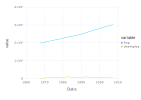

In [6]:
p_economics_ = plot(stack(data_economics_,[:Pop,:Unemploy]), x=:Date, y=:value, color=:variable,
     Geom.line)

### Столбчатый график
Для создания **столбчатого** графика будем использовать `Geom.bar`.  
 
Воспользуемся датасетом [UCBAdmissions](https://rdrr.io/r/datasets/UCBAdmissions.html), в котором сохранены данные о поступающих в 6 основных департаментов Университет Беркли в 1973 году (Admit - статус "Поступил/Не поступил", Gender - пол, Dept - департамент, Freq - кол-во абитуриентов):

In [15]:
adm = dataset("datasets", "UCBAdmissions")

24×4 DataFrame
│ Row │ Admit    │ Gender │ Dept   │ Freq  │
│     │ String   │ String │ String │ Int64 │
├─────┼──────────┼────────┼────────┼───────┤
│ 1   │ Admitted │ Male   │ A      │ 512   │
│ 2   │ Rejected │ Male   │ A      │ 313   │
│ 3   │ Admitted │ Female │ A      │ 89    │
│ 4   │ Rejected │ Female │ A      │ 19    │
│ 5   │ Admitted │ Male   │ B      │ 353   │
│ 6   │ Rejected │ Male   │ B      │ 207   │
│ 7   │ Admitted │ Female │ B      │ 17    │
│ 8   │ Rejected │ Female │ B      │ 8     │
│ 9   │ Admitted │ Male   │ C      │ 120   │
│ 10  │ Rejected │ Male   │ C      │ 205   │
⋮
│ 14  │ Rejected │ Male   │ D      │ 279   │
│ 15  │ Admitted │ Female │ D      │ 131   │
│ 16  │ Rejected │ Female │ D      │ 244   │
│ 17  │ Admitted │ Male   │ E      │ 53    │
│ 18  │ Rejected │ Male   │ E      │ 138   │
│ 19  │ Admitted │ Female │ E      │ 94    │
│ 20  │ Rejected │ Female │ E      │ 299   │
│ 21  │ Admitted │ Male   │ F      │ 22    │
│ 22  │ Rejected │ Male   │ F      │ 351   │
│ 23  │ Admitted │ Female │ F      │ 24    │
│ 24  │ Rejected │ Female │ F      │ 317   │

Сделаем новую таблицу, в которой не будет пола, следующим образом с помощью `combine` и  `groupby` из `DataFrames`:

In [16]:
adm_n = combine(groupby(adm,[:Dept,:Admit]), :Freq=>sum=>:Frequency)

12×3 DataFrame
│ Row │ Dept   │ Admit    │ Frequency │
│     │ String │ String   │ Int64     │
├─────┼────────┼──────────┼───────────┤
│ 1   │ A      │ Admitted │ 601       │
│ 2   │ A      │ Rejected │ 332       │
│ 3   │ B      │ Admitted │ 370       │
│ 4   │ B      │ Rejected │ 215       │
│ 5   │ C      │ Admitted │ 322       │
│ 6   │ C      │ Rejected │ 596       │
│ 7   │ D      │ Admitted │ 269       │
│ 8   │ D      │ Rejected │ 523       │
│ 9   │ E      │ Admitted │ 147       │
│ 10  │ E      │ Rejected │ 437       │
│ 11  │ F      │ Admitted │ 46        │
│ 12  │ F      │ Rejected │ 668       │

Выведем **столбчатую диаграмму** с количеством поступивших и не поступивших по департаментам:

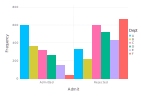

In [104]:
p_adm_1 = plot(adm_n, x=:Admit, y=:Frequency, color=:Dept, Geom.bar(position=:dodge))

У `Geom.bar` могут быть два аргумента: `position` (*dodge* или *stack*), `orientation`(*vertical* или *horizontal*). 
У графика выше аргументы `Geom.bar(position=:dodge,  orientation=:vertical)`.
 
Нарисуем график по департаментам с количеством поступивших и не поступивших с противоположными аргументами `Geom.bar(position=:stack, orientation=:horizontal)`. При смене ориентации графика необходимо данные для х и y поменять местами.

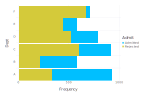

In [18]:
p_adm_2 = plot(adm_n, y=:Dept, x=:Frequency, color=:Admit, 
    Geom.bar(position=:stack, orientation=:horizontal), Theme(bar_spacing= + 0.5mm))

С помощью дополнительного аргумента `Theme(bar_spacing= + 0.5mm)` можно менять расстояние между столбцами в мм. При положительном числе столбцы будут находить на заданном расстоянии друг от друга, при отрицательном - пересекаться.

### Гистограмма
Для создания **гистограммы**, которая отображает распределение случайной величины в выборке, будем использовать`Geom.histogram`.
 
Возмем большой датасет [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) с более 50 000 наблюдениями о стоимости, весе и других показателях бриллиантов:

In [19]:
diamonds = dataset("ggplot2", "diamonds")

53940×10 DataFrame. Omitted printing of 3 columns
│ Row   │ Carat   │ Cut       │ Color │ Clarity │ Depth   │ Table   │ Price │
│       │ Float64 │ Cat…      │ Cat…  │ Cat…    │ Float64 │ Float64 │ Int32 │
├───────┼─────────┼───────────┼───────┼─────────┼─────────┼─────────┼───────┤
│ 1     │ 0.23    │ Ideal     │ E     │ SI2     │ 61.5    │ 55.0    │ 326   │
│ 2     │ 0.21    │ Premium   │ E     │ SI1     │ 59.8    │ 61.0    │ 326   │
│ 3     │ 0.23    │ Good      │ E     │ VS1     │ 56.9    │ 65.0    │ 327   │
│ 4     │ 0.29    │ Premium   │ I     │ VS2     │ 62.4    │ 58.0    │ 334   │
│ 5     │ 0.31    │ Good      │ J     │ SI2     │ 63.3    │ 58.0    │ 335   │
│ 6     │ 0.24    │ Very Good │ J     │ VVS2    │ 62.8    │ 57.0    │ 336   │
│ 7     │ 0.24    │ Very Good │ I     │ VVS1    │ 62.3    │ 57.0    │ 336   │
│ 8     │ 0.26    │ Very Good │ H     │ SI1     │ 61.9    │ 55.0    │ 337   │
│ 9     │ 0.22    │ Fair      │ E     │ VS2     │ 65.1    │ 61.0    │ 337   │
│ 10    │ 0.23    │ Very Good │ H     │ VS1     │ 59.4    │ 61.0    │ 338   │
⋮
│ 53930 │ 0.71    │ Ideal     │ G     │ VS1     │ 61.4    │ 56.0    │ 2756  │
│ 53931 │ 0.71    │ Premium   │ E     │ SI1     │ 60.5    │ 55.0    │ 2756  │
│ 53932 │ 0.71    │ Premium   │ F     │ SI1     │ 59.8    │ 62.0    │ 2756  │
│ 53933 │ 0.7     │ Very Good │ E     │ VS2     │ 60.5    │ 59.0    │ 2757  │
│ 53934 │ 0.7     │ Very Good │ E     │ VS2     │ 61.2    │ 59.0    │ 2757  │
│ 53935 │ 0.72    │ Premium   │ D     │ SI1     │ 62.7    │ 59.0    │ 2757  │
│ 53936 │ 0.72    │ Ideal     │ D     │ SI1     │ 60.8    │ 57.0    │ 2757  │
│ 53937 │ 0.72    │ Good      │ D     │ SI1     │ 63.1    │ 55.0    │ 2757  │
│ 53938 │ 0.7     │ Very Good │ D     │ SI1     │ 62.8    │ 60.0    │ 2757  │
│ 53939 │ 0.86    │ Premium   │ H     │ SI2     │ 61.0    │ 58.0    │ 2757  │
│ 53940 │ 0.75    │ Ideal     │ D     │ SI2     │ 62.2    │ 55.0    │ 2757  │

Выведем распределение стоимости бриллиантов в датасете:

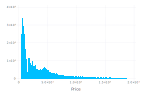

In [20]:
p_diamonds_1 = plot(diamonds, x=:Price, Geom.histogram)

Также можно изменять толщину столбцов с помощью `Geom.histogram(bincount=50)`. Чем больше число, тем уже столбцы.  
И добавим к предыдущему графику качество огранки.

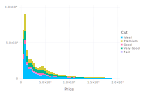

In [21]:
p_diamonds_2 = plot(diamonds, x=:Price, color=:Cut, Geom.histogram(bincount=50))

### Совмещение графиков

Нарисуем два графика рядом   
    
Для этого воспользуемся датасетом [Smoking, Alcohol and (O)esophageal Cancer](https://www.stat.auckland.ac.nz/~wild/data/Rdatasets/doc/datasets/esoph.html)

In [68]:
data = dataset("datasets", "esoph")

88×5 DataFrame
│ Row │ AgeGp │ AlcGp     │ TobGp    │ NCases │ NControls │
│     │ Cat…  │ Cat…      │ Cat…     │ Int32  │ Int32     │
├─────┼───────┼───────────┼──────────┼────────┼───────────┤
│ 1   │ 25-34 │ 0-39g/day │ 0-9g/day │ 0      │ 40        │
│ 2   │ 25-34 │ 0-39g/day │ 10-19    │ 0      │ 10        │
│ 3   │ 25-34 │ 0-39g/day │ 20-29    │ 0      │ 6         │
│ 4   │ 25-34 │ 0-39g/day │ 30+      │ 0      │ 5         │
│ 5   │ 25-34 │ 40-79     │ 0-9g/day │ 0      │ 27        │
│ 6   │ 25-34 │ 40-79     │ 10-19    │ 0      │ 7         │
│ 7   │ 25-34 │ 40-79     │ 20-29    │ 0      │ 4         │
│ 8   │ 25-34 │ 40-79     │ 30+      │ 0      │ 7         │
│ 9   │ 25-34 │ 80-119    │ 0-9g/day │ 0      │ 2         │
│ 10  │ 25-34 │ 80-119    │ 10-19    │ 0      │ 1         │
⋮
│ 78  │ 75+   │ 0-39g/day │ 0-9g/day │ 1      │ 18        │
│ 79  │ 75+   │ 0-39g/day │ 10-19    │ 2      │ 6         │
│ 80  │ 75+   │ 0-39g/day │ 30+      │ 1      │ 3         │
│ 81  │ 75+   │ 40-79     │ 0-9g/day │ 2      │ 5         │
│ 82  │ 75+   │ 40-79     │ 10-19    │ 1      │ 3         │
│ 83  │ 75+   │ 40-79     │ 20-29    │ 0      │ 3         │
│ 84  │ 75+   │ 40-79     │ 30+      │ 1      │ 1         │
│ 85  │ 75+   │ 80-119    │ 0-9g/day │ 1      │ 1         │
│ 86  │ 75+   │ 80-119    │ 10-19    │ 1      │ 1         │
│ 87  │ 75+   │ 120+      │ 0-9g/day │ 2      │ 2         │
│ 88  │ 75+   │ 120+      │ 10-19    │ 1      │ 1         │

Графики можно расположить как горизонтально при помощи функции `hstack`, 

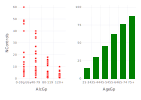

In [101]:
fig1a = plot(data, x="AlcGp", y="NControls", Geom.point, Theme(default_color=colorant"red"))
fig1b = plot(data, x="AgeGp", Geom.bar, Theme(bar_spacing=0.3cm, default_color=colorant"green"))
fig1 = hstack(fig1a, fig1b)

Так и вертикально при помощи функции `vstack`

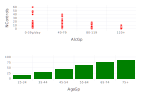

In [103]:
fig1 = vstack(fig1a, fig1b)

Построим два графика на одном  при помощи функции `layers`

In [81]:
# Для начала создадим два датасета
points = DataFrame(index=rand(0:10,30), val=rand(1:10,30))
line = DataFrame(val=rand(1:10,11), index = collect(0:10))

11×2 DataFrame
│ Row │ val   │ index │
│     │ Int64 │ Int64 │
├─────┼───────┼───────┤
│ 1   │ 4     │ 0     │
│ 2   │ 1     │ 1     │
│ 3   │ 9     │ 2     │
│ 4   │ 1     │ 3     │
│ 5   │ 2     │ 4     │
│ 6   │ 7     │ 5     │
│ 7   │ 9     │ 6     │
│ 8   │ 10    │ 7     │
│ 9   │ 2     │ 8     │
│ 10  │ 1     │ 9     │
│ 11  │ 4     │ 10    │

В каждом слое определяем, какой график хотим построить, и затем добавляем их в функцию `plot`

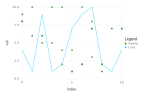

In [105]:
pointLayer = layer(points, x="index", y="val", Geom.point, Theme(default_color=colorant"green"))
lineLayer = layer(line, x="index", y="val", Geom.line)
graph = plot(pointLayer, lineLayer, Guide.manual_color_key("Legend", ["Points", "Line"], ["green", "deepskyblue"]))

### Добавляем title и меняем название осей

Для того, чтобы добавить название графика можно воспользоваться модулем `Guides`, очень схожий с модулем `Geometries`, который позволяет задавать тип графика

Возьмем один из ранее нарисованных графиков и добавим к нему `Guide.title`

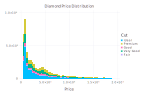

In [107]:
p_diamonds_2 = plot(diamonds, x=:Price, color=:Cut, Geom.histogram(bincount=50), Guide.title("Diamond Price Distribution"))

Модуль `Guides` также позволяет менять название осей.    
Используем `Guide.xlabel` для оси Ox и `Guide.ylabel` для оси Oy

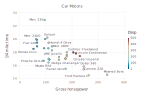

In [18]:
plot(mtcars, x=:HP, y=:QSec, label=:Model, color=:Disp,
         Geom.point, Geom.label, Guide.title("Car Motors"), Guide.ylabel("1/4 mile time"), Guide.xlabel("Gross horsepower"))

В модуле `Guides`  можно заменять метки на осях, цвета и еще несколько функций. Почитать об их применении более подробно можно [здесь](http://gadflyjl.org/v0.6/lib/guides.html).

#### Бонус! С помощью Gadfly можно задавать тему

Наприемер, установим темную тему`Gadfly.push_theme(:dark)`. Вернуться к дефолтной тем можно при помощи `Gadfly.push_theme(:default)`

In [19]:
Gadfly.push_theme(:dark)

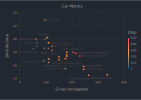

In [20]:
plot(mtcars, x=:HP, y=:QSec, label=:Model, color=:Disp,
         Geom.point, Geom.label, Guide.title("Car Motors"), Guide.ylabel("1/4 mile time"), Guide.xlabel("Gross horsepower"))

Также можно задать тему самому!

In [44]:
black_panel = Theme(
    panel_fill="black",
    default_color="orange",
    point_size=1.5mm
)

Theme(RGB{N0f8}(1.0,0.647,0.0), 1.5mm, 0.45mm, 1.8mm, Gadfly.Scale.default_discrete_sizes, Gadfly.Scale.default_continuous_sizes, Gadfly.Scale.default_discrete_colors, Function[Compose.circle, Gadfly.Shape.square, Gadfly.Shape.diamond, Gadfly.Shape.cross, Gadfly.Shape.xcross, Gadfly.Shape.utriangle, Gadfly.Shape.dtriangle, Gadfly.Shape.star1, Gadfly.Shape.star2, Gadfly.Shape.hexagon, Gadfly.Shape.octagon, Gadfly.Shape.hline, Gadfly.Shape.vline, Gadfly.Shape.ltriangle, Gadfly.Shape.rtriangle], 0.3mm, [:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0], RGB{N0f8}(0.0,0.0,0.0), nothing, 0.3mm, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, 0, "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.424,0.376,0.42), "'PT Sans','Helvetica Neue','H

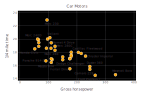

In [45]:
Gadfly.push_theme(black_panel)

plot(mtcars, x=:HP, y=:QSec, label=:Model,
         Geom.point, Geom.label, Guide.title("Car Motors"), Guide.ylabel("1/4 mile time"), Guide.xlabel("Gross horsepower"))

*Подробнее о стилизации графиков можно прочитать [здесь](http://gadflyjl.org/v0.6.3/man/themes.html#The-Dark-theme-1)*

### Сохранение графиков

Если необходимо сохранить график в виде картинки, то воспользуйтесь следующим кодом:
```julia
img = SVG("cars_plot.svg", 20cm, 10cm) #аргументы - название, ширина, длина картинки
draw(img, p_cars) # p_cars - график, созданный раннее
```
Так картинка будет в формате .svg, расположенная в папке с Вашим кодом.

### Что еще добавить
Описание о size, color, shape, alpha - для точечной диаграммы, linestyle и подобное для линейной
 
О scale осей
 

In [22]:
println(RDatasets.datasets("ggplot2")) #часть доступных датасетов

8×5 DataFrame
│ Row │ Package │ Dataset      │ Title                                                             │ Rows  │ Columns │
│     │ String  │ String       │ String                                                            │ Int64 │ Int64   │
├─────┼─────────┼──────────────┼───────────────────────────────────────────────────────────────────┼───────┼─────────┤
│ 1   │ ggplot2 │ diamonds     │ Prices of 50,000 round cut diamonds                               │ 53940 │ 10      │
│ 2   │ ggplot2 │ economics    │ US economic time series.                                          │ 478   │ 6       │
│ 3   │ ggplot2 │ midwest      │ Midwest demographics.                                             │ 437   │ 28      │
│ 4   │ ggplot2 │ movies       │ Movie information and user ratings from IMDB.com.                 │ 58788 │ 24      │
│ 5   │ ggplot2 │ mpg          │ Fuel economy data from 1999 and 2008 for 38 popular models of car │ 234   │ 11      │
│ 6   │ ggplot2 │ msleep       │ A